## Optimization with a mix of continuous and discrete variables

Populating the interactive namespace from numpy and matplotlib
-----
----- Running demo. It may take a few seconds.
-----
*Optimization completed:


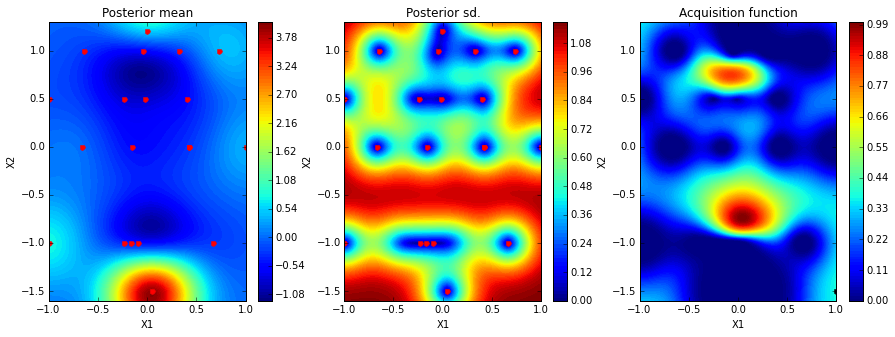

In [1]:
%pylab inline
import GPyOpt
from numpy.random import seed
seed(1234)
        
# --- Fucntion to optimize
func  = GPyOpt.objective_examples.experiments2d.sixhumpcamel() 
constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

# --- Space design
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
                                    {'name': 'var_2', 'type': 'discrete', 'domain': (-1.5,-1,0,.5,1, 1.2)}])

# --- Objective
objective = GPyOpt.core.task.SingleObjective(func.f)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, space, optimizer=aquisition_optimizer)

# --- CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', space, 5)

# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, evaluator, initial_design)


print '-----'
print '----- Running demo. It may take a few seconds.'
print '-----'

# --- Stop conditions
max_time  = None 
max_iter  = 15
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 
bo.plot_acquisition()

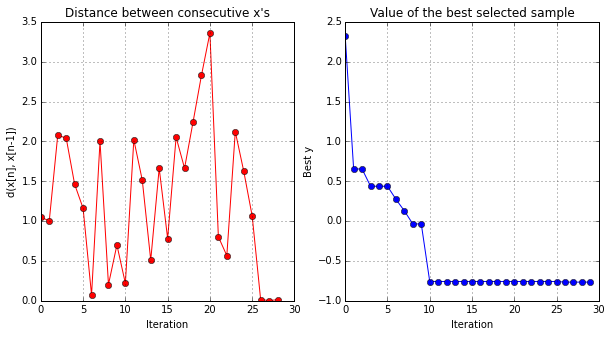

In [5]:
bo.plot_convergence()

In [8]:
bo.x_opt

array([-0.0629341,  0.5      ])